In [4]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [51]:
def plot_aprroximate(list_1 , list_2 , approx : int , title : str = None , xlabel : str = None , ylabel : str = None , saveas : str = None):
  """
  Smoothens the curve
  
  Args:
  list_1 : X axis
  list1_2 : Y axis
  approx : Value by how much the approximation has to be done
  title : Title of the resulting plot
  xlabel : x axis label
  ylabel : y axis label

  Returns:
  image of a Plot
  
  """
  
  list_x,list_y = list_1 , list_2
  plt.figure()
  poly = np.polyfit(list_x,list_y , approx)
  poly_y = np.poly1d(poly)(list_x)
  plt.plot(list_x,poly_y)
  if xlabel != None:
    plt.xlabel(xlabel)
  if ylabel != None:
    plt.ylabel(ylabel)
  
  plt.title(title)

  if saveas != None:
    plt.savefig(saveas)
  plt.show()

In [6]:
def string_to_float_list(string_data):
    # Remove square brackets and split the string by commas
    values_str = string_data.strip('[]')
    float_list = [float(val.strip()) for val in values_str.split(',')]

    return float_list

In [7]:
# prompt: stretch or shrink a list based on the length provided

def stretch_or_shrink(list1, length):
  """
  Stretches or shrinks a list to a given length by repeating or removing elements.

  Args:
    list1: The list to be stretched or shrunk.
    length: The desired length of the list.

  Returns:
    A stretched or shrunk list.
  """

  if length < len(list1):
    return list1[:length]
  elif length > len(list1):
    return list1 + [list1[-1]] * (length - len(list1))
  else:
    return list1


In [13]:
comedy_movies_intensities = pd.read_csv("/Users/mohamedmafaz/Desktop/Trailer Analysis/Intensities/comedy_movies100.csv")
comedy_movies_intensities_list = []
for rows in range(comedy_movies_intensities.shape[0]):
    string_list_of_intensities = comedy_movies_intensities.iloc[rows]["combined_array"]
    float_list_of_intensities = string_to_float_list(string_list_of_intensities)
    comedy_movies_intensities_list.append(float_list_of_intensities)

len(comedy_movies_intensities_list)

97

In [14]:
sum([len(i) for i in comedy_movies_intensities_list]) / len(comedy_movies_intensities_list)

3212.659793814433

In [15]:
# Aproimating it to 3500

def normalize(data):
    min_val = min(data)
    max_val = max(data)

    normalized = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized

comedy_movies_intensities_list_normalized = []
for rows in range(comedy_movies_intensities.shape[0]):
    string_list_of_intensities = comedy_movies_intensities.iloc[rows]["combined_array"]
    float_list_of_intensities = string_to_float_list(string_list_of_intensities)

    if max(float_list_of_intensities) == 0.0:
        pass
    else:
        float_list_of_intensities_normalized = normalize(stretch_or_shrink(float_list_of_intensities , 3500)) # Normalizing it to [0-1] and streching or shrinking it to 3500 in lenght
        comedy_movies_intensities_list_normalized.append(float_list_of_intensities_normalized)

In [16]:
dropped = comedy_movies_intensities.shape[0] - len(comedy_movies_intensities_list_normalized) 
print(f"{dropped} record dropped due to them being completely blank")

0 record dropped due to them being completely blank


In [17]:
movie_name_list = list(comedy_movies_intensities["movie"])
movie_name_list

['Dumb & Dumber (1994) Official Trailer - Jim Carrey Jeff Daniels Comedy HD.',
 'Strange Wilderness - Trailer.',
 'Caddyshack (1980) Official Trailer - Chevy Chase Movie.',
 'The Wedding Singer (1998) Trailer 1  Movieclips Classic Trailers.',
 'Mrs Doubtfire (1993) Trailer 1  Movieclips Classic Trailers.',
 'Vampires Kiss Official Trailer 1 - Nicolas Cage Movie (1988) HD.',
 'Better Off Dead (1985) ORIGINAL TRAILER [HD 1080p].',
 'Revenge of The Nerds  TBT Trailer  20th Century FOX.',
 'National Lampoons Vegas Vacation - Trailer 1.',
 'The Pest Trailer.',
 'Spring Breakers  Consider This  Official Promo HD  A24.',
 'MR DEEDS [2002] - Official Trailer (HD).',
 'Old School (2003) Official Trailer - Will Ferrell Luke Wilson Comedy HD.',
 'Screwballs TV Spot (1983) (low quality).',
 'Spaceballs (1987)  Official Trailer  MGM Studios.',
 'Encino Man Theatrical Trailer.',
 'The Burbs (1989) - Official Trailer.',
 'Dude Wheres My Car  TBT Trailer  20th Century FOX.',
 'The Last American Virgin

In [18]:
avg_intensity = np.mean(np.array(comedy_movies_intensities_list_normalized) ,  axis=0)
avg_intensity = normalize(avg_intensity) # Normalizing the average
avg_intensity

[0.03998183416068455,
 0.035891878742911346,
 0.02626958711739647,
 0.03914212378305485,
 0.0406972013206875,
 0.05553168034634485,
 0.05187805676955812,
 0.04819676589119934,
 0.03393074758185247,
 0.02761909645808748,
 0.023072426259220107,
 0.025773443767842154,
 0.03905574017970787,
 0.031413668054739156,
 0.025289115055113345,
 0.023113713184723425,
 0.019397943015452564,
 0.019590100986463157,
 0.022463871897834792,
 0.0320109101714177,
 0.05821284953462789,
 0.05293951005216945,
 0.06998312813938626,
 0.07578147514689172,
 0.08881592774095916,
 0.10804536453518657,
 0.12059036293604637,
 0.12806358995079906,
 0.14370699565892758,
 0.16131800897994422,
 0.18740629319614566,
 0.18557619971973374,
 0.19329139313994506,
 0.22696859191488883,
 0.2716905546948936,
 0.2880414154808687,
 0.28384529476468445,
 0.2936575233683961,
 0.31159864893949824,
 0.3050216237288955,
 0.30892398880000027,
 0.32500205872168714,
 0.3051801990903352,
 0.29275983639069697,
 0.29705018961532614,
 0.33703

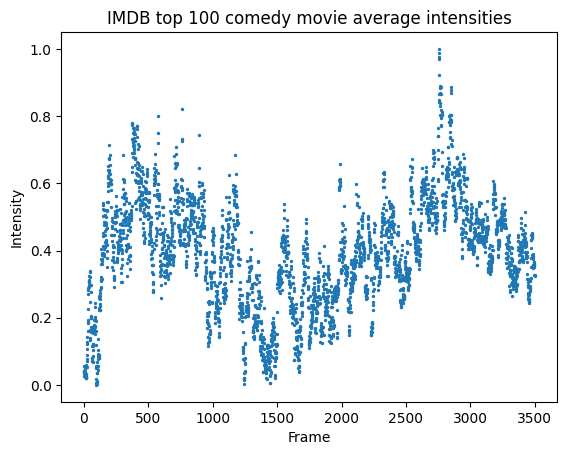

In [19]:
plt.scatter(range(3500) , avg_intensity , s = 2)
plt.title("IMDB top 100 comedy movie average intensities")
plt.xlabel("Frame")
plt.ylabel("Intensity")
plt.show()

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_5967/3925468303.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_data, y_data, degree)


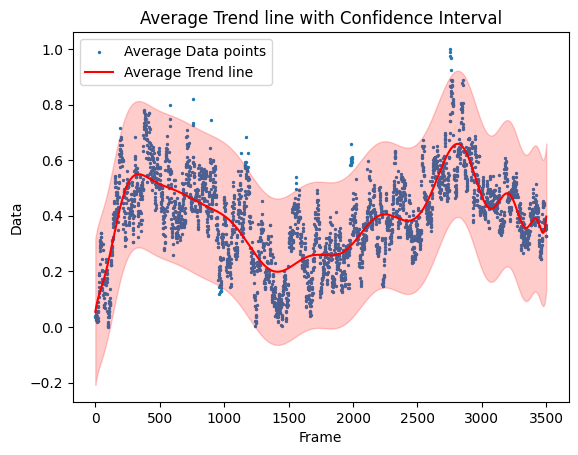

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data in the 'y_data' variable
y_data = avg_intensity

# Create an array for the x-values corresponding to the indices of the 'y_data'
x_data = np.arange(len(y_data))

# Perform linear regression using polyfit
degree = 40
coefficients = np.polyfit(x_data, y_data, degree)

# Create a function based on the coefficients to represent the regression line
poly_function = np.poly1d(coefficients)

# Generate y-values for the regression line
regression_line = poly_function(x_data)

# Calculate confidence interval (adjust the value as needed)
confidence = 1.645 * np.std(y_data)  # Assuming 95% confidence

# Plot the original data and the regression line with shaded area for uncertainty
plt.scatter(x_data, y_data, label='Average Data points', s=2)
plt.plot(x_data, regression_line, color='red', label='Average Trend line')

# Shaded area for confidence interval
plt.fill_between(x_data, regression_line - confidence, regression_line + confidence, color='red', alpha=0.2)

plt.xlabel('Frame')
plt.ylabel('Data')
plt.title('Average Trend line with Confidence Interval')
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(avg_intensity, regression_line)
r2

0.5863690753985942

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_5967/3186615058.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


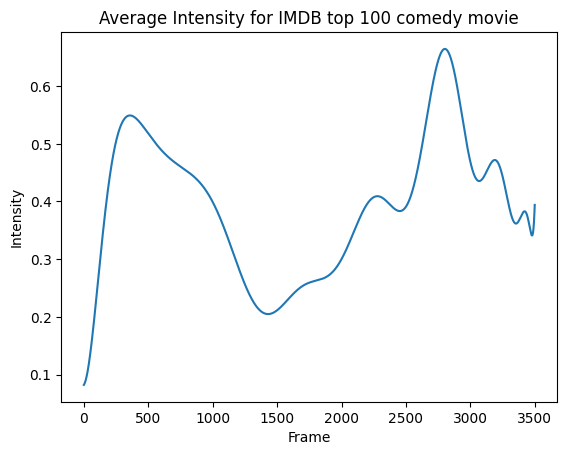

In [52]:
plot_aprroximate(range(3500) , avg_intensity , 30 , title = "Average Intensity for IMDB top 100 comedy movie" , 
                 xlabel="Frame" , ylabel="Intensity" , saveas = f'/Users/mohamedmafaz/Desktop/Trailer Analysis/Average pngs/Comedy100.png')


In [42]:
len(comedy_movies_intensities_list_normalized)

97

In [43]:
movie_name_list

['Dumb & Dumber (1994) Official Trailer - Jim Carrey Jeff Daniels Comedy HD.',
 'Strange Wilderness - Trailer.',
 'Caddyshack (1980) Official Trailer - Chevy Chase Movie.',
 'The Wedding Singer (1998) Trailer 1  Movieclips Classic Trailers.',
 'Mrs Doubtfire (1993) Trailer 1  Movieclips Classic Trailers.',
 'Vampires Kiss Official Trailer 1 - Nicolas Cage Movie (1988) HD.',
 'Better Off Dead (1985) ORIGINAL TRAILER [HD 1080p].',
 'Revenge of The Nerds  TBT Trailer  20th Century FOX.',
 'National Lampoons Vegas Vacation - Trailer 1.',
 'The Pest Trailer.',
 'Spring Breakers  Consider This  Official Promo HD  A24.',
 'MR DEEDS [2002] - Official Trailer (HD).',
 'Old School (2003) Official Trailer - Will Ferrell Luke Wilson Comedy HD.',
 'Screwballs TV Spot (1983) (low quality).',
 'Spaceballs (1987)  Official Trailer  MGM Studios.',
 'Encino Man Theatrical Trailer.',
 'The Burbs (1989) - Official Trailer.',
 'Dude Wheres My Car  TBT Trailer  20th Century FOX.',
 'The Last American Virgin

In [ ]:
for movie_name , movie_intensity in zip(movie_name_list , comedy_movies_intensities_list_normalized):
    plot_aprroximate(range(3500) , movie_intensity , 30 , title = movie_name , 
                    xlabel="Frame" , ylabel="Intensity" , 
                    saveas = f'/Users/mohamedmafaz/Desktop/Trailer Analysis/Comedy pngs/{movie_name} intensity.png')


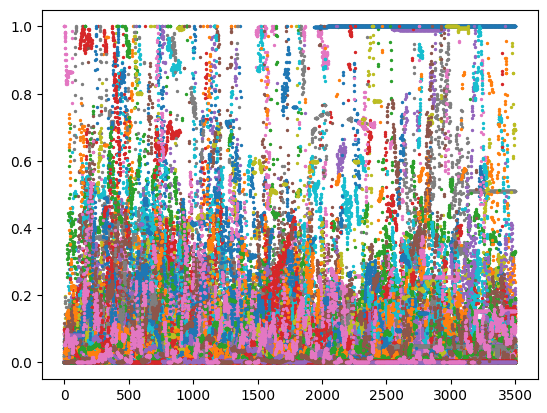

In [23]:
for i in comedy_movies_intensities_list_normalized:
    plt.scatter(range(3500) , i , s = 2)

In [39]:
import os

# Define the file path with a raw string
file_path = r'Desktop/Average pngs/Comedy100.png'

# Check if the file exists
if os.path.exists(file_path):
    print("File exists!")
else:
    print("File does not exist.")

File does not exist.
